In this demonstration we'll look at a sample example, which would be following the same procedure through which the assignment problem can be solved

In [2]:
conda activate 0env1


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda info --envs

# conda environments:
#
                      *  D:\Users\admin\Anaconda3
base                     D:\Users\admin\anaconda3
0env1                    D:\Users\admin\anaconda3\envs\0env1


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda info


     active environment : base
    active env location : D:\Users\admin\Anaconda3
            shell level : 1
       user config file : C:\Users\admin\.condarc
 populated config files : C:\Users\admin\.condarc
          conda version : 4.9.2
    conda-build version : 3.18.11
         python version : 3.8.3.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : D:\Users\admin\anaconda3  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : D:\Users\admin\anaconda3\pkgs
                          C:\Users\admin\.conda\pkgs
                   

In [2]:
#!pip install --user ipykernel
# !D:\github\0env1\Scripts\activate
# !where python3
# !pip install pyclustertend
# !jupyter kernelspec list
# jupyter kernelspec uninstall myenv
# !pip  list 0env1

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#Let's read the dataset first
dat = pd.read_csv("iris2.csv")
dat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
dat.shape

(150, 4)

In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
dat.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

### Let's begin with analysis part 

### 1. Principal Component Analysis

In [7]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(dat)

In [8]:
pd.DataFrame(dat2)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [9]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [10]:
#Performing the PCA
pca.fit(dat2)

PCA(random_state=42, svd_solver='randomized')

In [11]:
#List of PCA components.
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [12]:
#Let's check the variance ratios
variance = np.insert( pca.explained_variance_ratio_, 0 ,0)
np.cumsum(variance)

array([0.        , 0.72770452, 0.95800975, 0.99484807, 1.        ])

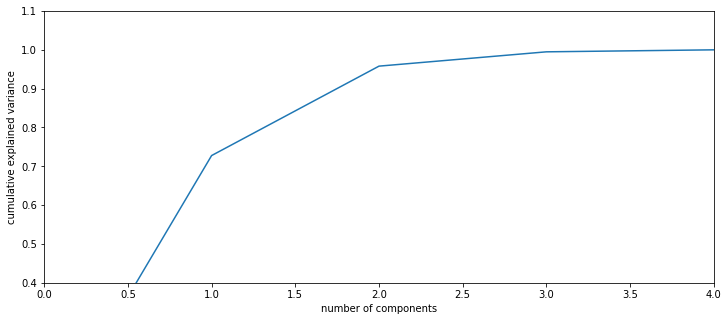

In [13]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,5))
plt.plot(np.cumsum(variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.ylim(.4,1.1)
plt.xlim(0,4)
plt.show()

Around 96% of the information is being explained by 2 components

In [14]:
#Understanding how the original 4 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(dat.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,sepal_length,0.522372,0.372318,-0.721017,-0.261996
1,sepal_width,-0.263355,0.925556,0.242033,0.124135
2,petal_length,0.581254,0.021095,0.140892,0.801154
3,petal_width,0.565611,0.065416,0.633801,-0.523546


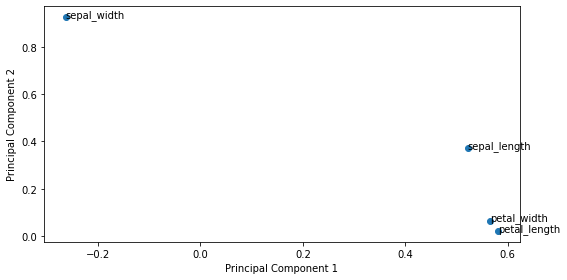

In [15]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,4))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [16]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=2)

In [17]:
df_pca = pca_final.fit_transform(dat2)
df_pca.shape

(150, 2)

In [18]:
pd.DataFrame(df_pca)

,0,1
0,-2.264280,0.505960
1,-2.085786,-0.654725
2,-2.368034,-0.318846
3,-2.304392,-0.575928
4,-2.388891,0.674479
...,...,...
145,1.869943,0.382172
146,1.558677,-0.905024
147,1.520405,0.266308
148,1.374035,1.013127


In [19]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [20]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})

In [21]:
pcs_df2.head()

,PC1,PC2
0,-2.264280,0.505960
1,-2.085786,-0.654725
2,-2.368034,-0.318846
3,-2.304392,-0.575928
4,-2.388891,0.674479


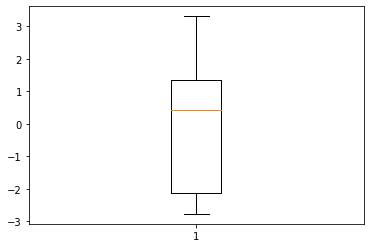

In [22]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

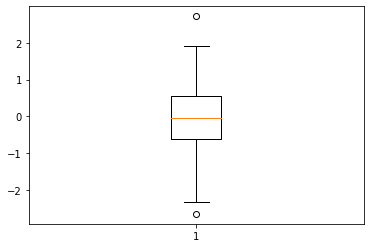

In [23]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

In [24]:
pcs_df2.shape

(120, 2)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

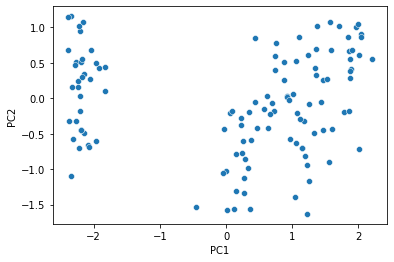

In [25]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

In [26]:
#Some distinct clusters are already visible to us.
#Let's go ahead and begin with the clustering process

## Clustering 

In [27]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [28]:
from pyclustertend import hopkins

In [32]:
def my_hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m )
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return 1-H

In [33]:
my_hopkins(pcs_df2)

0.19214955025096203

In [34]:
#Let's check the Hopkins measure
n = len(pcs_df2) # rows
m = int(0.1 * n) 
   
hopkins(pcs_df2,m)

0.23730340249785423

In [115]:
#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [83]:
dat3_1 = pcs_df2

### K- means Clustering

In [84]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

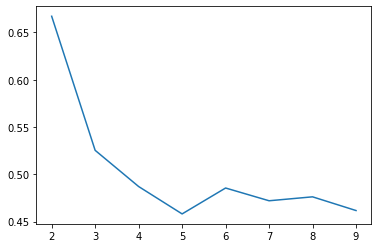

In [85]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

D:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


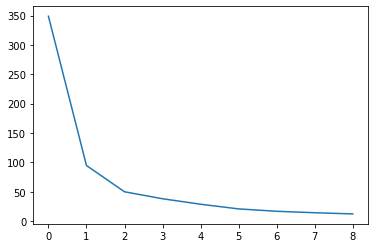

In [87]:
## From the above analysis we find that 5 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [89]:
#Here also we're seeing a distinct bend at around 2 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=2
model_clus2 = KMeans(n_clusters = 2, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(max_iter=50, n_clusters=2, random_state=50)

In [90]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','ClusterID']
dat_km

,PC1,PC2,ClusterID
0,-2.264280,0.505960,1
1,-2.085786,-0.654725,1
2,-2.368034,-0.318846,1
3,-2.304392,-0.575928,1
4,-2.388891,0.674479,1
...,...,...,...
115,1.869943,0.382172,0
116,1.558677,-0.905024,0
117,1.520405,0.266308,0
118,1.374035,1.013127,0


In [91]:
dat_km['ClusterID'].value_counts()

0    85
1    35
Name: ClusterID, dtype: int64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

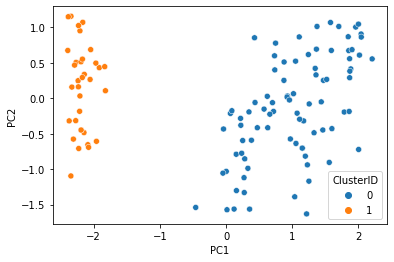

In [92]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [93]:
#Important note: The following merging is actually wrong for this particular case and in the live session this code was used
# since you would have performed the outlier analysis on the dataset and would be missing certain values
#However this would work when you do it with the countries data
#You do need to merge the original dataset with the clusters. 
#Since you would be clustering on the basis of country name that problem would be avoided.
dat5=pd.merge(dat,dat_km, left_index=True,right_index=True)
dat5.head()

,sepal_length,sepal_width,petal_length,petal_width,PC1,PC2,ClusterID
0,5.1,3.5,1.4,0.2,-2.264280,0.505960,1
1,4.9,3.0,1.4,0.2,-2.085786,-0.654725,1
2,4.7,3.2,1.3,0.2,-2.368034,-0.318846,1
3,4.6,3.1,1.5,0.2,-2.304392,-0.575928,1
4,5.0,3.6,1.4,0.2,-2.388891,0.674479,1


In [94]:
dat6=dat5.drop(['PC1','PC2'],axis=1)
dat6.head()

,sepal_length,sepal_width,petal_length,petal_width,ClusterID
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [95]:
#So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

## Analysis of the clusters

In [96]:
clu_sepl = 	pd.DataFrame(dat6.groupby(["ClusterID"]).sepal_length.mean())
clu_sepw= 	pd.DataFrame(dat6.groupby(["ClusterID"]).sepal_width.mean())
clu_pl = 	pd.DataFrame(dat6.groupby(["ClusterID"]).petal_length.mean())
clu_pw = 	pd.DataFrame(dat6.groupby(["ClusterID"]).petal_width.mean())

In [97]:
df = pd.concat([pd.Series([0,1]),clu_sepl,clu_sepw,clu_pl,clu_pw], axis=1)

In [98]:
df.columns = ["ClusterID","Sepal_length","Sepal_Width","Petal_length","Petal_Width"]
df

,ClusterID,Sepal_length,Sepal_Width,Petal_length,Petal_Width
0,0,5.902353,2.898824,4.089412,1.305882
1,1,5.045714,3.468571,1.477143,0.240000


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

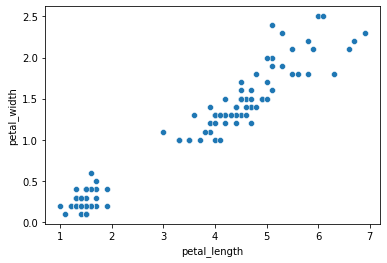

In [99]:
sns.scatterplot(x='petal_length',y='petal_width',data=dat6)

In [140]:
#Let's say my problem statement here is to just the find the flowers which have a very low petal length and petal width.
#Here's how you can make up for the outlier analysis that you did earlier.
#So you can choose those cluster means as cut offs and find the final list of flowers.

In [100]:
#Let's use the concept of binning
fin=dat[dat['petal_length']<=1.477]
fin=fin[fin['petal_width']<= 0.24]

In [101]:
fin

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
4,5.0,3.6,1.4,0.2
8,4.4,2.9,1.4,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2
22,4.6,3.6,1.0,0.2
28,5.2,3.4,1.4,0.2
